In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
# reading the data 
# printing to get an idea about dependent and independent variables
data = pd.read_csv("QualityPrediction.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Data Statistics and Information

In [3]:
# Extractung the basic information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
# Extraction of statistics of the dataset
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
#Checking if any column as NA values
data.isna().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Feature Selection and Outlier Treatment

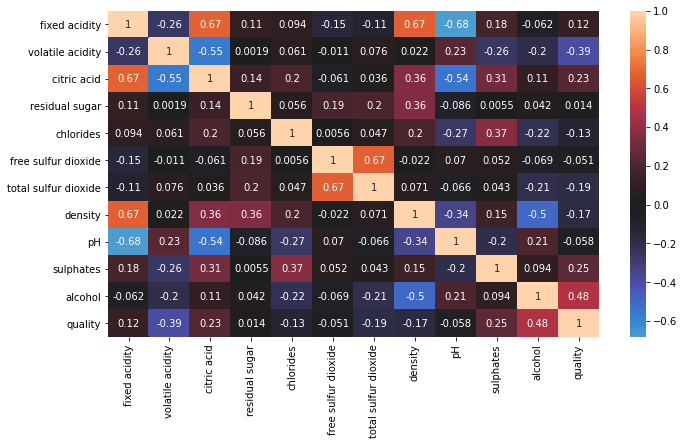

In [6]:
# Plotting Correlation among all of the variables
f,ax = plt.subplots(figsize=(11, 6))
sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)

ax = sns.heatmap(data.corr(), annot = True, center = 0)
loc = "/home/ashish/Learnbay_python_classes/Stats and ML/Machine Learning/Capstone Project/"
fout = loc + "corr.png"
#plt.savefig(fout , dpi =150, bbox_inches='tight', facecolor = 'white')


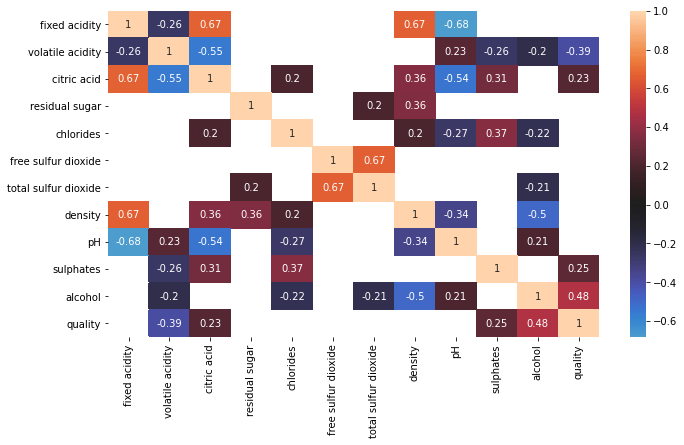

In [7]:
# Slicing the correlation data with correlation more than 20%
# Plotting the sliced data
f,ax = plt.subplots(figsize=(11, 6))
corr = data.corr()
corr = corr[(corr>0.2)|(corr<-0.2)]
ax = sns.heatmap(corr, annot = True, center =0)
#plt.savefig(loc + "selective_corr" , dpi =150, bbox_inches='tight', facecolor = 'white')


### One can obsevre the most correlated variables are:
- volatile acidity : -0.39
- citric acidity : 0.23
- sulphates : 0.25
- alcohol : 0.48


0.73

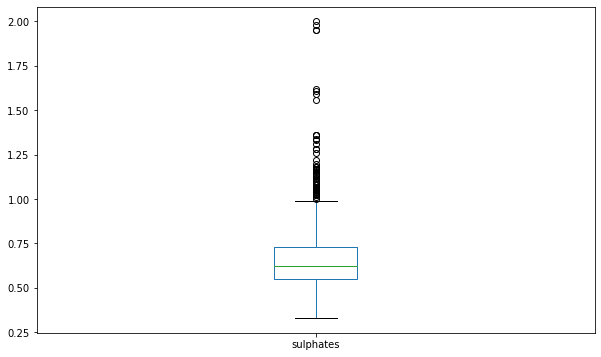

In [8]:
# Box plot for sulphates varibales
plt.figure(figsize=(10,6))
data.loc[:,"sulphates"].plot(kind = 'box')
data.loc[:,"sulphates"].describe()['75%']

<AxesSubplot:>

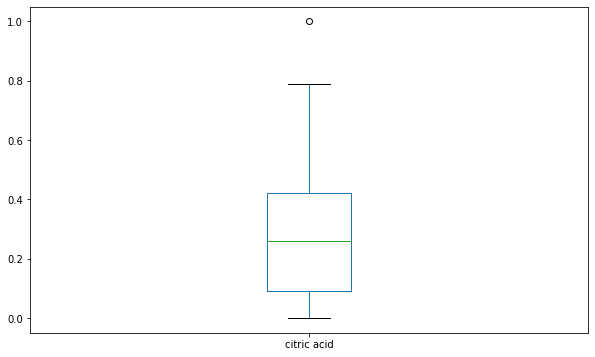

In [9]:
# Box plot for "citric acid" varibales

plt.figure(figsize=(10,6))
data.loc[:,"citric acid"].plot(kind = 'box')


<AxesSubplot:>

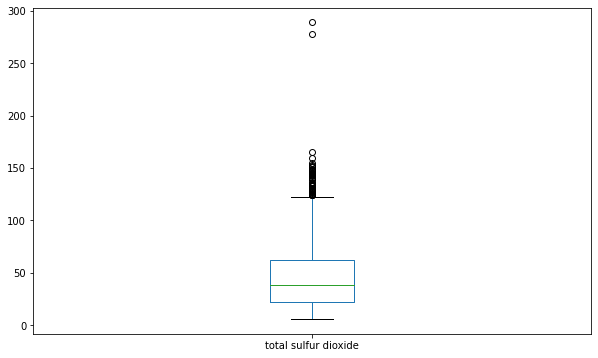

In [10]:
# Box plot for "total sulfur dioxide" varibales

plt.figure(figsize=(10,6))
data.loc[:,"total sulfur dioxide"].plot(kind = 'box')


<AxesSubplot:>

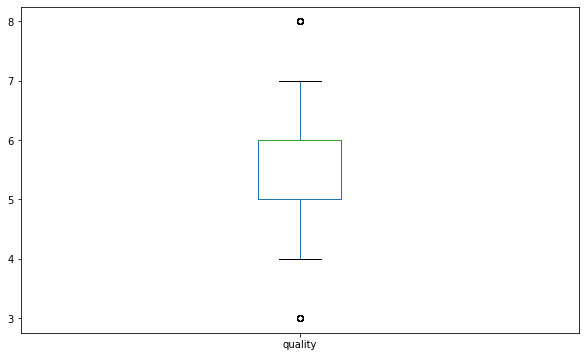

In [11]:
# Box plot for "quality" varibales

plt.figure(figsize=(10,6))
data.quality.plot(kind='box')

0.64

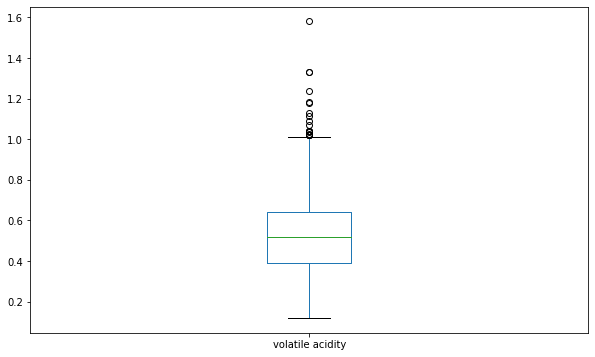

In [12]:
# Box plot for "volatile acidity" varibales

plt.figure(figsize=(10,6))
data.loc[:,"volatile acidity"].plot(kind = 'box')
data.loc[:,"volatile acidity"].describe()['75%']

<AxesSubplot:>

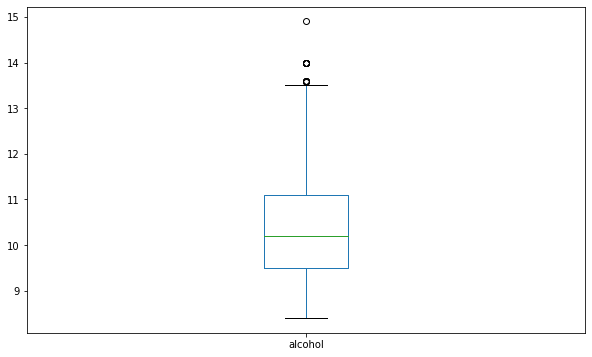

In [13]:
# Box plot for "alcohol" varibales

plt.figure(figsize=(10,6))
data.loc[:,"alcohol"].plot(kind = 'box')


In [14]:
def outlier_treatment(data,col):
    """
    Use this for outlier treatment of a particular column or varibale. 
    This code remove the whole row where outlier is present.
    
    data: The whole data set where outlier treatment will be done
    col: The column or variable where outlier treatment needs to be done. 
         (Provide one column at a time and use that data in next outlier treatment)
    
    
    """
    print(f"Data shape before outlier treatment {np.shape(data)} ")
    q3 = col.describe()["75%"]
    q2 = col.describe()["50%"]
    q1 = col.describe()["25%"]
    iqr = q3-q1
    col = col.values

    for i in range(len(col)):
        row = list(data.axes[0])

        if (col[i] > q3+ 1.5*iqr) or (col[i]< q1-1.5*iqr):
            
            if  i in row:
            #print(i, col[i])
                data.drop(i,axis =0, inplace = True) 

    print(f"Data shape after outlier treatment {np.shape(data)} ")
    return data


In [15]:
data1 = outlier_treatment(data,data.loc[::,'volatile acidity'])
data2 = outlier_treatment(data1,data1.loc[::,'alcohol'])
data3 = outlier_treatment(data2,data2.loc[::,'quality'])
data4 = outlier_treatment(data3,data3.loc[::,'sulphates'])
data5 = outlier_treatment(data4,data4.loc[::,'total sulfur dioxide'])
#data6 = outlier_treatment(data5,data5.loc[::,'citric acid'])


data5.reset_index()

Data shape before outlier treatment (1599, 12) 
Data shape after outlier treatment (1580, 12) 
Data shape before outlier treatment (1580, 12) 
Data shape after outlier treatment (1567, 12) 
Data shape before outlier treatment (1567, 12) 
Data shape after outlier treatment (1542, 12) 
Data shape before outlier treatment (1542, 12) 
Data shape after outlier treatment (1487, 12) 
Data shape before outlier treatment (1487, 12) 
Data shape after outlier treatment (1449, 12) 


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1445,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1446,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1447,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Split Train and Test Data

In [16]:
X = data5.loc[:,data5.columns != 'quality'].values
Y = data5.loc[:,'quality']

In [43]:
X2 = data5.loc[:,['volatile acidity','alcohol']].values
X1 = data5.loc[:,['volatile acidity','sulphates', 'citric acid', 'alcohol']].values

In [44]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
x = std_scaler.fit_transform(X)


In [45]:
x1 = std_scaler.fit_transform(X1)
x2 = std_scaler.fit_transform(X2)

In [46]:
xtrain, xtest, ytrain, ytest = train_test_split(x,Y,test_size=0.20,random_state=40)


In [47]:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x1,Y,test_size=0.20,random_state=40)
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(x2,Y,test_size=0.20,random_state=40)


In [48]:
ytrain = ytrain.values.flatten()
ytest = ytest.values.flatten()

ytrain1 = ytrain1.values.flatten()
ytest1 = ytest1.values.flatten()

ytrain2 = ytrain2.values.flatten()
ytest2 = ytest2.values.flatten()
print(ytest)

[6 6 5 6 5 7 5 7 5 7 6 5 6 6 6 4 5 8 5 5 6 6 5 6 5 6 4 5 7 5 6 6 5 6 5 5 7
 6 5 5 6 6 5 6 5 5 5 8 5 5 5 5 5 6 5 5 5 7 6 5 5 6 6 6 4 5 5 5 7 6 5 5 5 5
 6 6 6 6 4 6 7 5 5 6 5 6 6 7 5 6 6 5 5 5 6 6 5 7 5 5 5 6 7 6 6 6 5 4 6 5 6
 5 6 6 6 5 6 5 7 6 7 6 5 6 5 6 6 5 5 7 6 5 6 5 6 5 6 6 5 5 5 5 7 5 4 4 5 5
 4 7 6 5 6 5 6 7 6 7 7 5 6 5 6 5 5 5 5 5 5 6 7 6 6 5 5 6 5 6 7 5 6 6 6 6 6
 6 5 5 5 6 7 5 6 6 6 7 6 6 7 7 6 6 6 7 5 5 5 5 5 6 5 5 5 6 6 5 6 5 5 5 6 6
 6 5 5 7 6 6 6 6 6 6 4 5 6 6 5 6 7 7 5 7 6 6 7 5 6 5 5 7 6 6 5 4 5 5 8 4 4
 6 6 6 6 5 5 5 6 5 6 6 5 6 5 6 6 5 5 6 5 5 6 6 6 6 5 7 5 5 6 6]


# Random Forest Classifier


In [49]:
# Using random forest classifier 
model = RandomForestClassifier(random_state=2)
model1 = RandomForestClassifier(random_state=3)
model2 = RandomForestClassifier(random_state=4)



## Without Hyperparameter Tuning

### All Features

In [50]:
# without any hyperparamter trying to check the accuracy of the model
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
score = model.score(xtest, ytest)
print("Results without hyperparameter tuning")
print(f"Mean squared error {metrics.mean_squared_error(ytest, ypred)}")
print(f"R2 Score {metrics.r2_score(ytest, ypred)}")
print(f"Accuracy of model {model.score(xtest, ytest)}")
    

Results without hyperparameter tuning
Mean squared error 0.3758620689655172
R2 Score 0.3789905895758433
Accuracy of model 0.7241379310344828


### Feature 1:  'volatile acidity','sulphates', 'citric acid', 'alcohol'

In [51]:
model1.fit(xtrain1, ytrain1)
ypred1 = model1.predict(xtest1)
score1 = model1.score(xtest1, ytest1)
print("Results without hyperparameter tuning")
print(f"Mean squared error {metrics.mean_squared_error(ytest1, ypred1)}")
print(f"R2 Score {metrics.r2_score(ytest1, ypred1)}")
print(f"Accuracy of model {model1.score(xtest1, ytest1)}")

Results without hyperparameter tuning
Mean squared error 0.35517241379310344
R2 Score 0.41317459381937494
Accuracy of model 0.7068965517241379


### Feature 2: 'volatile acidity','alcohol'

In [52]:
## without any hyperparamter trying to check the accuracy of the model
model2.fit(xtrain2, ytrain2)
ypred2 = model2.predict(xtest2)
score2 = model2.score(xtest2, ytest2)
print("Results without hyperparameter tuning")
print(f"Mean squared error {metrics.mean_squared_error(ytest2, ypred2)}")
print(f"R2 Score {metrics.r2_score(ytest2, ypred2)}")
print(f"Accuracy of model {model2.score(xtest2, ytest2)}")

Results without hyperparameter tuning
Mean squared error 0.6241379310344828
R2 Score -0.03121746134653547
Accuracy of model 0.6


In [53]:
print(score,score1,score2)

0.7241379310344828 0.7068965517241379 0.6


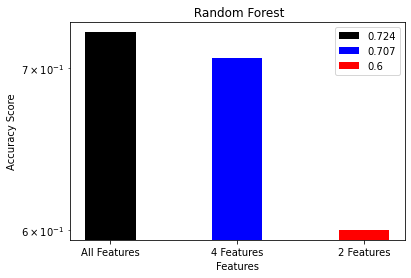

In [54]:
x = ['All Features','4 Features','2 Features']
y = [score,score1,score2] 
y1 = []
for i in y:
    y1.append('{0:.3g}'.format(i))
plt.xlabel('Features')
plt.ylabel('Accuracy Score')
plt.title(" Random Forest")
plt.yscale('log')
plt.bar(x[0],y[0], width = 0.4,color = 'black', label = y1[0])
plt.bar(x[1],y[1], width = 0.4,color = 'blue', label = y1[1])
plt.bar(x[2],y[2], width = 0.4,color = 'red', label = y1[2])

plt.legend()
#plt.savefig(loc + "rf_accuracy.png" , dpi =150, bbox_inches='tight', facecolor = 'white')

#### Considering the accuracy to be highest i.e. 0.724 when using all the features, we will be proceeding by choosing all the features. Also we will try hyperparameter optimisation for training set to be all the features

## Grid Search CV for Hyperparameter

In [28]:
# Using grid search cv to tune the hyperparamter
# Obtaining the parameters to optimise the model
param_dist = {'max_depth':[20,40,80],
             'bootstrap':[True,False],
             'max_features':['auto','sqrt','log2',None],
             'criterion':['gini','entropy']}

cv_rf = GridSearchCV(model,cv=6,param_grid=param_dist,n_jobs=-1)
cv_rf.fit(xtrain,ytrain)
print('Best Parameters using Grid search: \n',cv_rf.best_params_)

Best Parameters using Grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 20, 'max_features': None}


In [29]:
# Setting the parameters obtained through grid search cv
model.set_params(bootstrap = True, criterion='gini',max_depth = 20, max_features = None)

RandomForestClassifier(max_depth=20, random_state=2)

In [30]:
# Trying to estimate oob error 
model.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 100
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    model.set_params(n_estimators=i)
    model.fit(xtrain, ytrain)

    oob_error = 1 - model.oob_score_
    error_rate[i] = oob_error

/home/ashish/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:368: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


In [31]:
# Converting oob error into a series
oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 100 to 1000 Trees)')

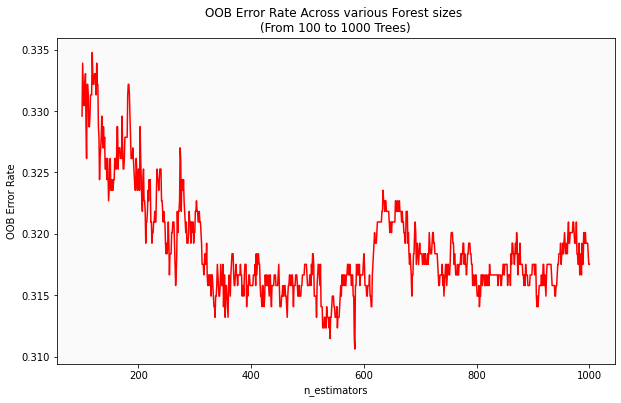

In [32]:
# Plotting oob error to determine where our model is accurate and robust
fig, ax = plt.subplots(figsize=(10,6))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 100 to 1000 Trees)')

In [33]:
# setting n_estimators as 550, as it provides us a robust and accurate model
model.set_params(n_estimators=400,bootstrap=False,warm_start=False,oob_score=False)

RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=400,
                       random_state=2)

In [34]:
# fitting the model with training data
model.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=400,
                       random_state=2)

In [35]:
# predicting using xtest
predictions_rf = model.predict(xtest)
ypred_rf = predictions_rf

In [36]:
# Estimating the accuracy, mean squared error, R2 score
accuracy_rf = model.score(xtest,ytest)
print("Results after hyperparameter tuning")
print(f"Mean squared error {metrics.mean_squared_error(ytest, ypred_rf)}")
print(f"R2 Score {metrics.r2_score(ytest, ypred_rf)}")
print(f"Accuracy of model {model.score(xtest, ytest)}")


Results after hyperparameter tuning
Mean squared error 0.40344827586206894
R2 Score 0.3334119172511346
Accuracy of model 0.7172413793103448


### This model gives a 71.724% accuracy after hyperparameter tuning.
### Earlier the accuracy without hyperparameter tuning was 72.41% but the model wasn't robust.
### One can conclude robustness of this model from the OOB graph

In [37]:
# Trying to estimate the importance of variable by using mean decrease in impurity

names_index = data.columns[data.columns != "quality" ]
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
dic = {'importance': importances,
            'index': indices} 
importance = dic['importance']
for f in range(0, indices.shape[0]):
        i = f
        print("{0}. The feature '{1}' has a Mean Decrease in Impurity of {2:.5f}"
              .format(f + 1,
                      names_index[indices[i]],
                      importance[indices[f]]))

1. The feature 'alcohol' has a Mean Decrease in Impurity of 0.14493
2. The feature 'sulphates' has a Mean Decrease in Impurity of 0.10992
3. The feature 'total sulfur dioxide' has a Mean Decrease in Impurity of 0.10871
4. The feature 'volatile acidity' has a Mean Decrease in Impurity of 0.09464
5. The feature 'density' has a Mean Decrease in Impurity of 0.09184
6. The feature 'chlorides' has a Mean Decrease in Impurity of 0.08506
7. The feature 'citric acid' has a Mean Decrease in Impurity of 0.07576
8. The feature 'fixed acidity' has a Mean Decrease in Impurity of 0.07543
9. The feature 'pH' has a Mean Decrease in Impurity of 0.07451
10. The feature 'residual sugar' has a Mean Decrease in Impurity of 0.07161
11. The feature 'free sulfur dioxide' has a Mean Decrease in Impurity of 0.06760


In [38]:
# calculating confusion matrix for 3,4,5,6,7,8 ratings
cm = confusion_matrix(ytest, ypred_rf)
cm_df = pd.DataFrame(cm,
                     index = ['3','4','5','6','7', '8'], 
                     columns = ['3','4','5','6','7', '8'])


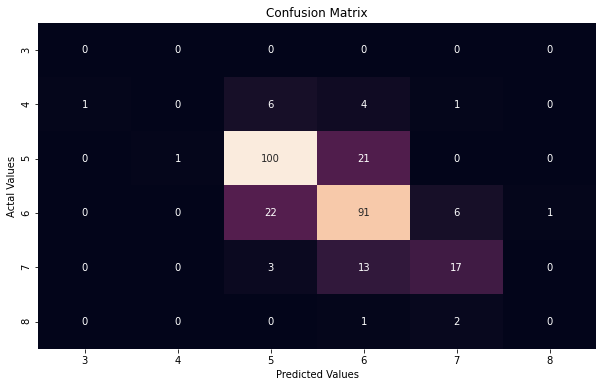

In [64]:
# Plotting confusion matrix for 3,4,5,6,7,8 ratings

plt.figure(figsize=(10,6))
sns.heatmap(cm_df, annot=True,fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.savefig(loc + "rf_confusion.png" , dpi =150, bbox_inches='tight', facecolor = 'white')

# ADA Boost Clasifier

In [56]:
# Using ADA boost to determine the accuracy
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=12),random_state=2)
ada_boost1 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=12),random_state=3)
ada_boost2 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=12),random_state=4)


### Without Hyperparameter Tuning

### All Features

In [57]:
# Training model without hyperparamter tuning and calculating accuracy
ada_boost.fit(xtrain, ytrain)

ypred_ada = ada_boost.predict(xtest)

score_ada = ada_boost.score(xtest, ytest)
print("Results without hyperparameter tuning")
print(f"Mean squared error {metrics.mean_squared_error(ytest, ypred)}")
print(f"R2 Score {metrics.r2_score(ytest, ypred)}")
print(f"Accuracy of model {ada_boost.score(xtest, ytest)}")
    

Results without hyperparameter tuning
Mean squared error 0.3758620689655172
R2 Score 0.3789905895758433
Accuracy of model 0.7379310344827587


### Feature 1:  'volatile acidity','sulphates', 'citric acid', 'alcohol'

In [58]:
ada_boost1.fit(xtrain1, ytrain)
ypred_ada1 = ada_boost1.predict(xtest1)
score_ada1 = ada_boost1.score(xtest1, ytest1)
print("Results without hyperparameter tuning")
print(f"Mean squared error {metrics.mean_squared_error(ytest, ypred)}")
print(f"R2 Score {metrics.r2_score(ytest, ypred)}")
print(f"Accuracy of model {ada_boost1.score(xtest1, ytest)}")

Results without hyperparameter tuning
Mean squared error 0.3758620689655172
R2 Score 0.3789905895758433
Accuracy of model 0.7275862068965517


### Feature 2: 'volatile acidity','alcohol'

In [59]:
# without any hyperparamter trying to check the accuracy of the model
ada_boost2.fit(xtrain2, ytrain)
ypred_ada2 = ada_boost2.predict(xtest2)
score_ada2 = ada_boost2.score(xtest2, ytest2)
print("Results without hyperparameter tuning")
print(f"Mean squared error {metrics.mean_squared_error(ytest, ypred)}")
print(f"R2 Score {metrics.r2_score(ytest, ypred)}")
print(f"Accuracy of model {ada_boost2.score(xtest2, ytest)}")

Results without hyperparameter tuning
Mean squared error 0.3758620689655172
R2 Score 0.3789905895758433
Accuracy of model 0.6103448275862069


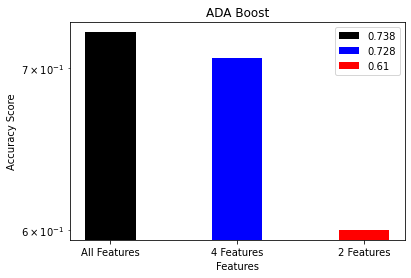

In [61]:
# Plotting the accuracy for different combinations of feature values
x = ['All Features','4 Features','2 Features']
y_ada = [score_ada,score_ada1,score_ada2] 
y1_ada = []
for i in y_ada:
    y1_ada.append('{0:.3g}'.format(i))
plt.xlabel('Features')
plt.ylabel('Accuracy Score')
plt.title("ADA Boost")
plt.yscale('log')
plt.bar(x[0],y[0], width = 0.4,color = 'black', label = y1_ada[0])
plt.bar(x[1],y[1], width = 0.4,color = 'blue', label = y1_ada[1])
plt.bar(x[2],y[2], width = 0.4,color = 'red', label = y1_ada[2])
plt.legend()
plt.savefig(loc + "ada_accuracy.png" , dpi =150, bbox_inches='tight', facecolor = 'white')

#### Considering the accuracy to be highest i.e. 0.738 when using all the features, we will be proceeding by choosing all the features. Also we will try hyperparameter optimisation for training set to be all the features

## Grid Search CV: Hyperparameter Tuning

In [62]:
# Using grid search cv to tune the hyperparamter
# Obtaining the parameters to optimise the model
param_dist = {'n_estimators':[20,40,80,100],
             'learning_rate':[1.1,1.3, 1.5,1.7],
             'algorithm': ['SAMME', 'SAMME.R']}

cv_rf = GridSearchCV(ada_boost,cv=6,param_grid=param_dist,n_jobs=-1)
cv_rf.fit(xtrain,ytrain)
print('Best Parameters using Grid search: \n',cv_rf.best_params_)

Best Parameters using Grid search: 
 {'algorithm': 'SAMME.R', 'learning_rate': 1.1, 'n_estimators': 100}


In [65]:
# setting alorithm as SAMME, learning rate 1.1 and n-estimators = 80,
# as it provides us a robust and accurate model

ada_boost.set_params(algorithm  = "SAMME.R", learning_rate =1.1, n_estimators = 100)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=12),
                   learning_rate=1.1, n_estimators=100, random_state=2)

In [66]:
# fitting the model with training data

ada_boost.fit(xtrain,ytrain)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=12),
                   learning_rate=1.1, n_estimators=100, random_state=2)

In [67]:
ypred_ada = ada_boost.predict(xtest)

In [68]:
accuracy_rf = ada_boost.score(xtest,ytest)
print("Results after hyperparameter tuning")
print(f"Mean squared error {metrics.mean_squared_error(ytest, ypred_ada)}")
print(f"R2 Score {metrics.r2_score(ytest, ypred_ada)}")
print(f"Accuracy of model {ada_boost.score(xtest, ytest)}")


Results after hyperparameter tuning
Mean squared error 0.38620689655172413
R2 Score 0.36189858745407755
Accuracy of model 0.7344827586206897


### This model gives a 73.448% accuracy after hyperparameter tuning.
### Earlier the accuracy without hyperparameter tuning was 73.79% but the model wasn't robust.


In [70]:
# calculating confusion matrix for 3,4,5,6,7,8 ratings

cm = confusion_matrix(ytest, ypred_ada)
cm_df = pd.DataFrame(cm,
                     index = ['3','4','5','6','7', '8'], 
                     columns = ['3','4','5','6','7', '8'])


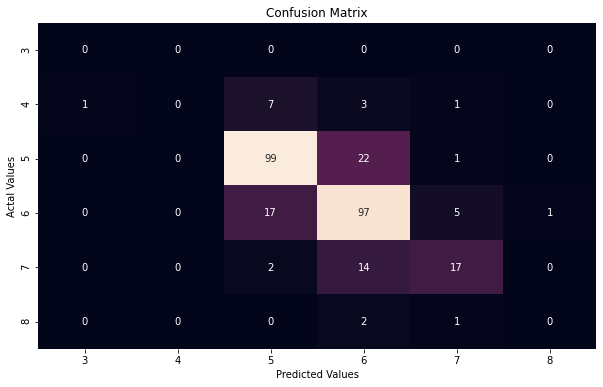

In [71]:
# Plotting confusion matrix for 3,4,5,6,7,8 ratings

plt.figure(figsize=(10,6))
sns.heatmap(cm_df, annot=True,fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.savefig(loc + "ada_accuracy.png" , dpi =150, bbox_inches='tight', facecolor = 'white')
plt.show()